# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# Libraries to help with evaluating different ensemble models
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
data = dataset.copy()

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.describe(include='object')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


In [ ]:

data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:

#to check negative values in the employee column
data.loc[data['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
# to make absolute values for the number of employees
data['no_of_employees'] = data['no_of_employees'].abs()

In [ ]:
# we can drop ID as its not relevant to keep
data.drop('case_id',axis=1, inplace=True)

In [ ]:
# to check the count of each unique category in each of the categorical variables
for col in data.select_dtypes(include='object'):

  print(data[col].value_counts(True))
  print('-'*50)

continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: proportion, dtype: float64
--------------------------------------------------
unit_of_wage
Year     0.901177
Hour     0.084655
Week     0.010675
M

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Observations on number of employees

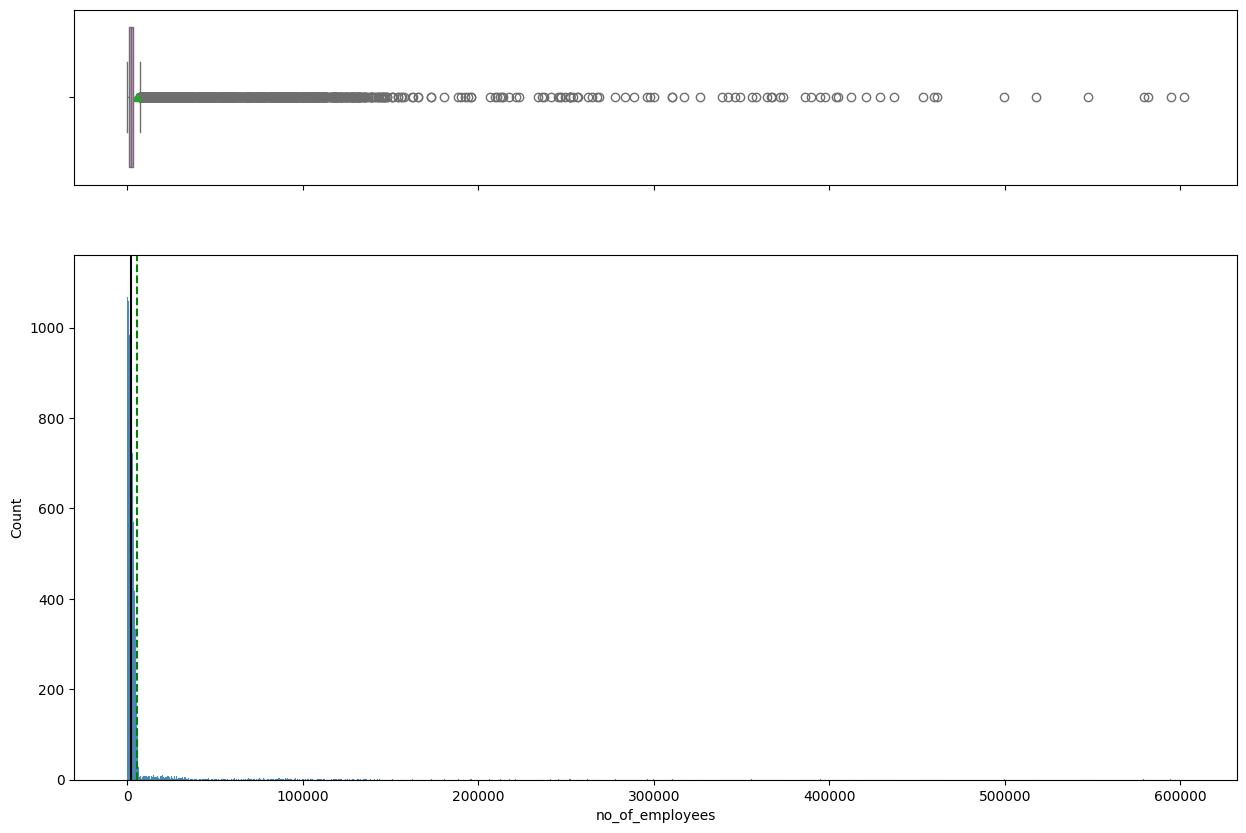

In [ ]:
histogram_boxplot(data, 'no_of_employees')

* The data is positively skewed, meaning that a few companies have a very high number of employees compared to the rest.
* These outliers could represent large enterprises or multinational corporations that employ a significantly higher number of people than typical companies.
* Most observations have a small number of employees, likely representing small to medium-sized businesses.

Observations on prevailing wage

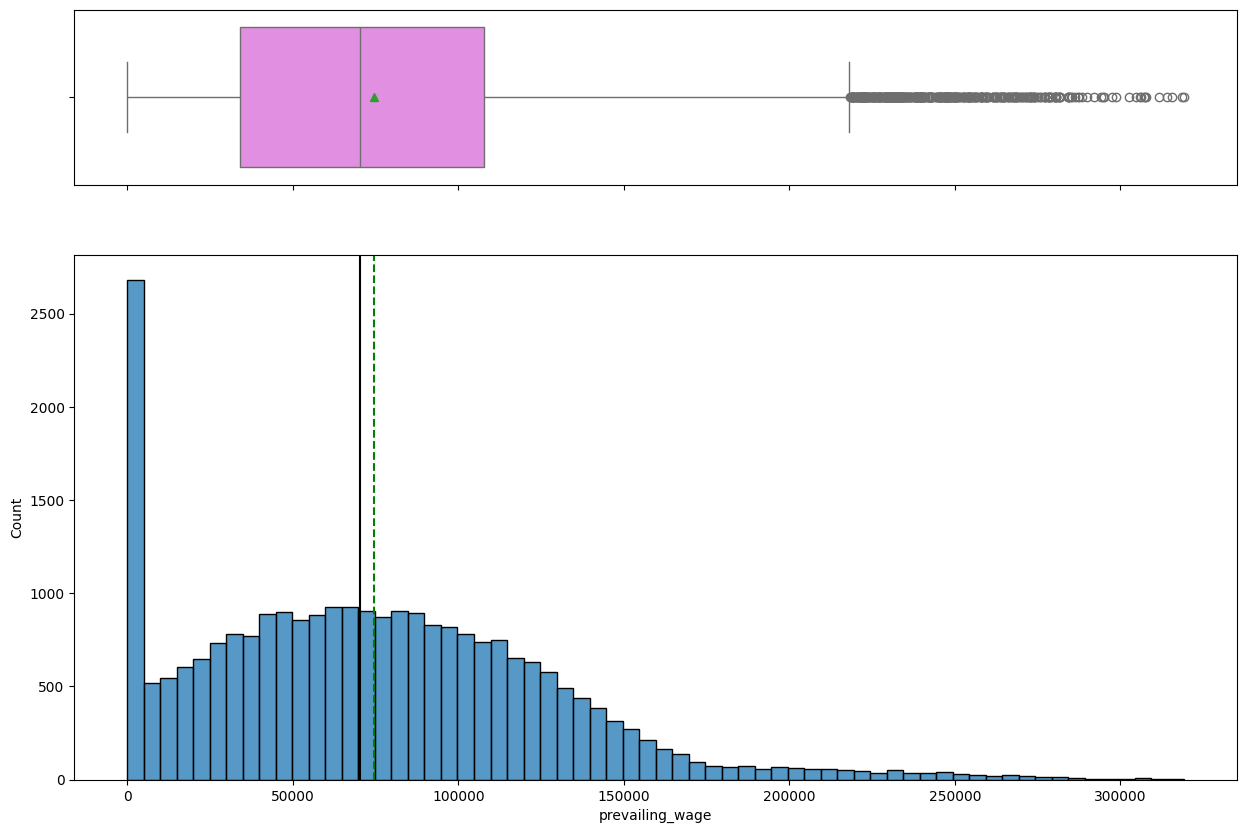

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

* The positive skew suggests that while most jobs or roles have lower to moderate wages, there are a few positions with significantly higher wages.
* The outliers could represent specialized high-paying jobs or executive roles that deviate from the typical wage scale.
* The large spike at zero suggests that there may be data quality issues or specific categories of unpaid work.
* The majority of the prevailing wage data is concentrated below 100,000, indicating that most of the roles fall within a relatively lower wage range.

Observation on Year of Establishment

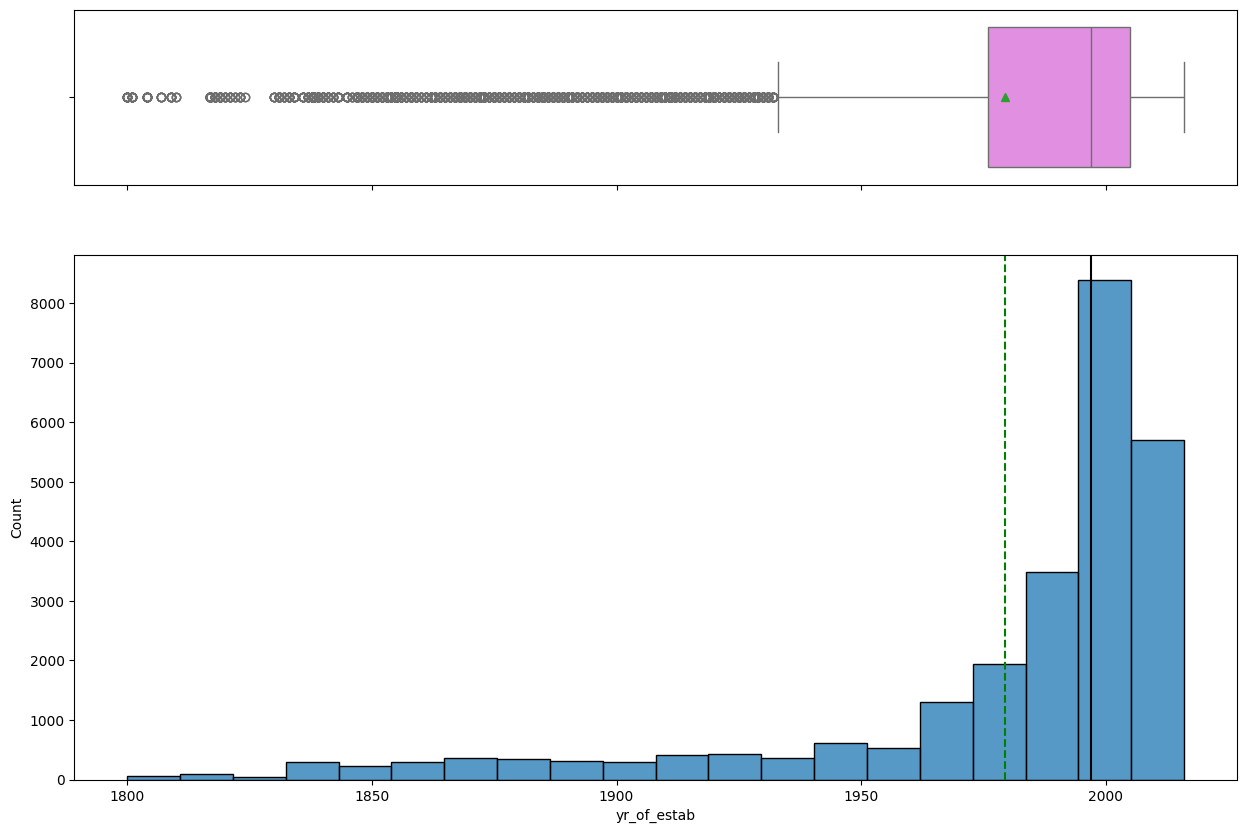

In [ ]:
histogram_boxplot(data, 'yr_of_estab', bins = 20)

Key Insights:
* Recent Dominance: The majority of entities in the dataset were established in the last few decades, especially after 1980. This suggests that newer companies dominate the data.
* Historical Outliers: There are a few historical outliers with establishment dates much earlier than 1900, which could represent very old institutions or possibly data entry errors.
* Right Skew: The data is right-skewed, meaning that there are fewer older establishments and a higher concentration of newer ones.
* Potential Data Cleaning: The entities established before 1800 might need further review to confirm their validity, as they could represent anomalies or incorrect data entries.

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
# count observations which have less than 100 prevailing wage
len(data.loc[data['prevailing_wage'] < 100])

176

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observations on continent

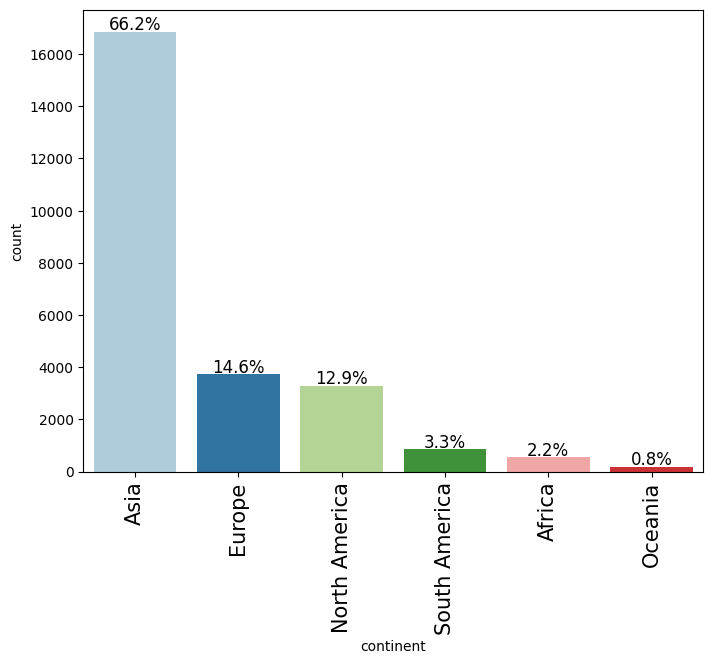

In [ ]:
labeled_barplot(data, 'continent', perc = True)

Dominance of Asia:

* Asia holds the largest portion, making up 66.2% of the dataset.
Other Major Contributors:

* Europe accounts for 14.6%, followed by North America with 12.9%.
Minor Contributors:

* The distribution is highly skewed towards Asia, with the rest of the continents collectively making up about 33.8% of the data.

Observations on educaation of employees

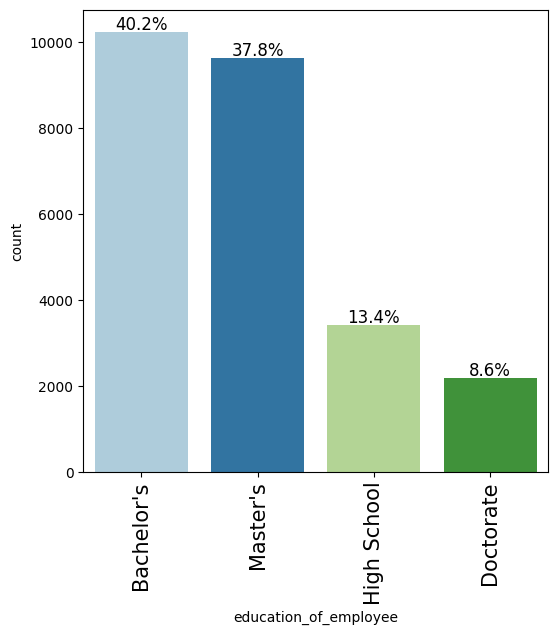

In [ ]:
labeled_barplot(data, 'education_of_employee', perc = True)

* Majority of Employees Hold Bachelor's Degrees
* Close Representation of Master's Degree Holders
* Smaller Groups with High School and Doctorate Education


Observations on job experience

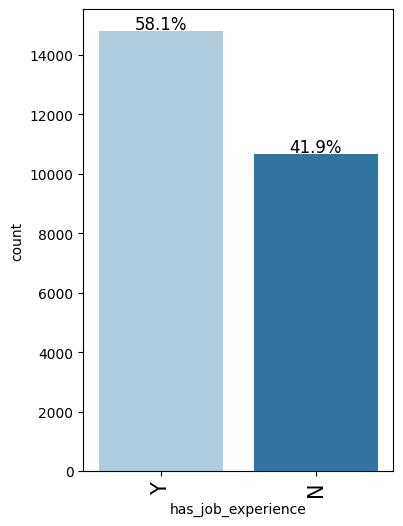

In [ ]:
labeled_barplot(data, 'has_job_experience', perc = True)

Job Experience Breakdown:

* 58.1% of individuals have job experience, indicating that they might be more suitable for positions that require prior experience.
* 41.9% do not have job experience, highlighting a need for entry-level opportunities, internships, or training programs.

Observations on job training

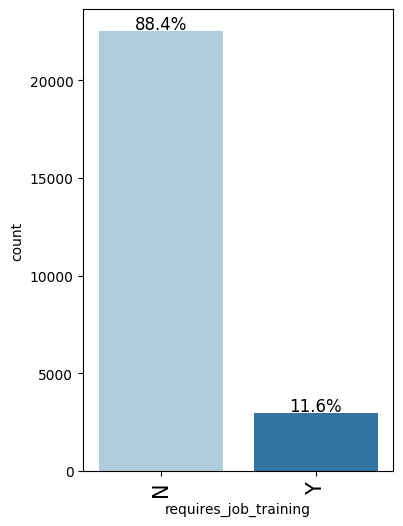

In [ ]:
labeled_barplot(data, 'requires_job_training', perc = True)

Observations on region of employment

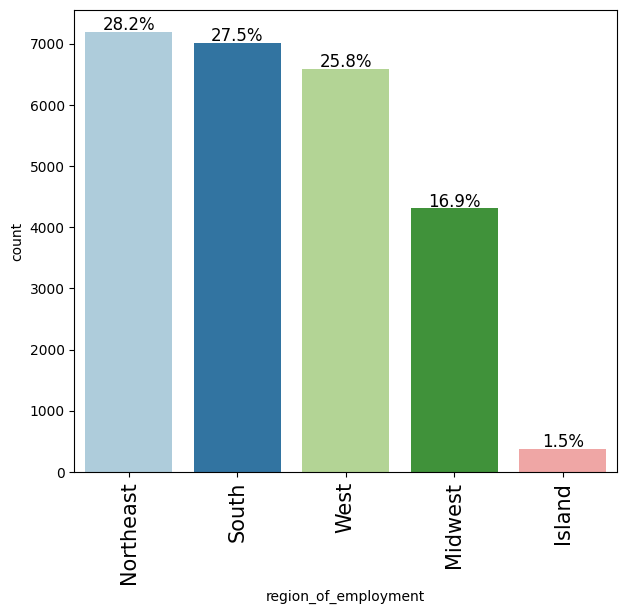

In [ ]:
labeled_barplot(data, 'region_of_employment', perc = True)

* The Northeast holds the highest proportion, with 28.2% of the total, slightly more than the other regions.
* South accounts for 27.5%, making it nearly as significant as the Northeast.
* West follows with 25.8%, showing a fairly even distribution between these three regions.
* Islands account for only 1.5% of the total.

Observations on unit of age

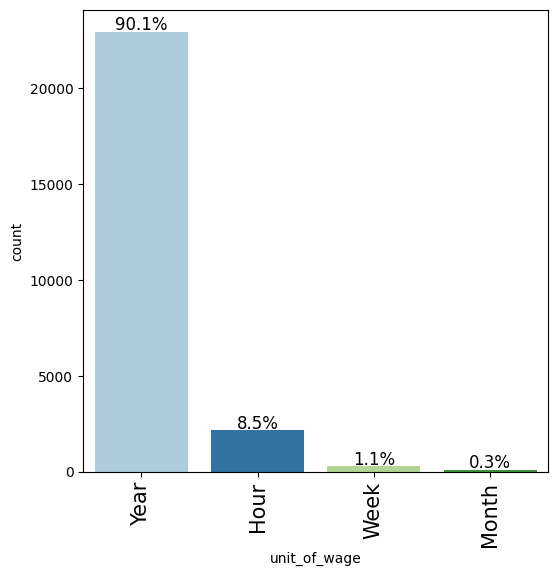

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc = True)

* 90.1% of the entries have wages recorded on a yearly basis. It indicates a focus on long-term employment contracts.
* 8.5% of the data represents hourly wages, these may be typical of part-time or temporary positions.
* Only 1.1% of entries have wages calculated weekly and 0.3% on a monthly basis.

Observations on full time/part time position

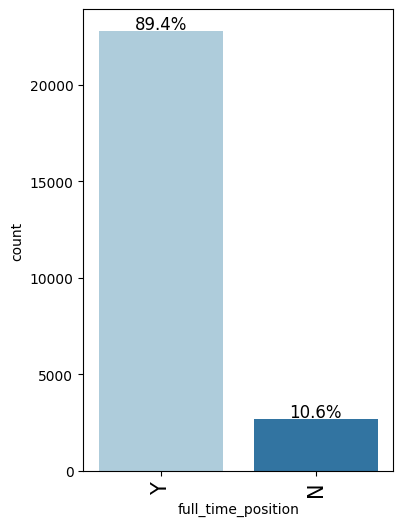

In [ ]:
labeled_barplot(data, 'full_time_position', perc = True)

* Majority of certifications belong to full time positions

Observations on case status

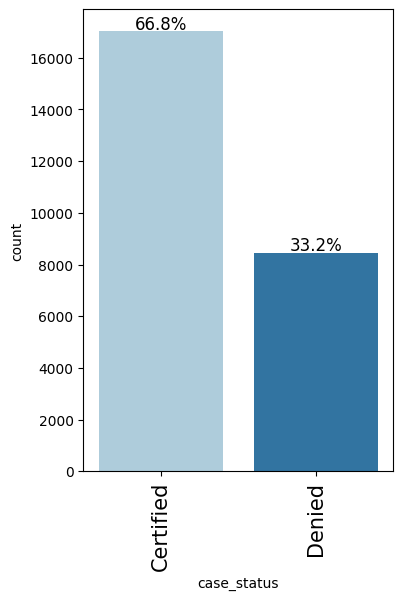

In [ ]:
labeled_barplot(data, 'case_status', perc = True)

* Majority of applications are certified

#### Bivariate Analysis

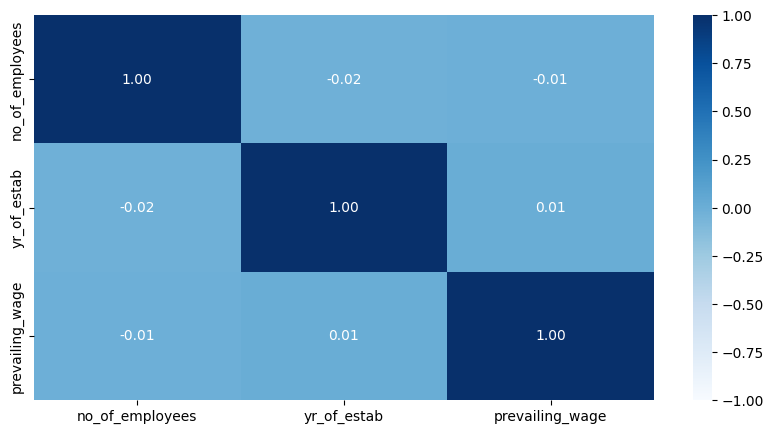

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

plt.figure(figsize=(10,5))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.show()


* seems there is no correlation among numerical variables

Creating functions that will help us with further analysis.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


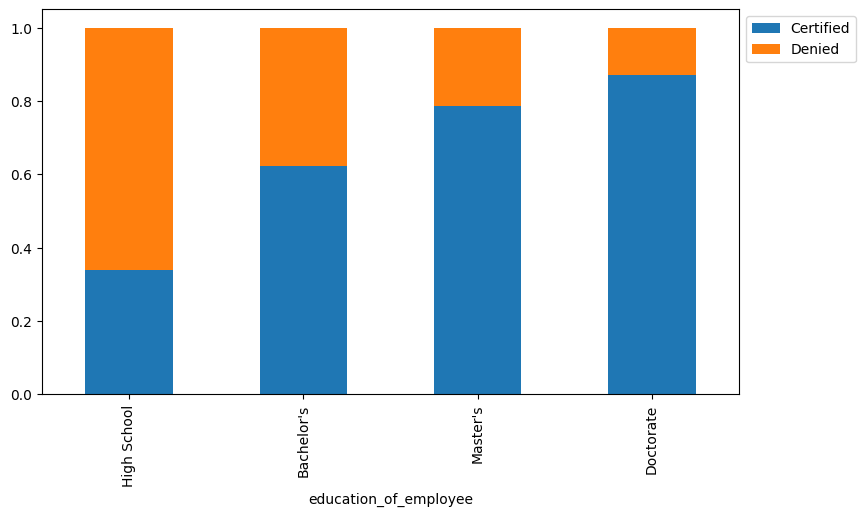

In [ ]:
#Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
stacked_barplot(data, 'education_of_employee', 'case_status')

* Higher education levels correlate with better certification rates.
* Doctorate holders have the highest chances of approval, while High School graduates face the highest denial rates.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


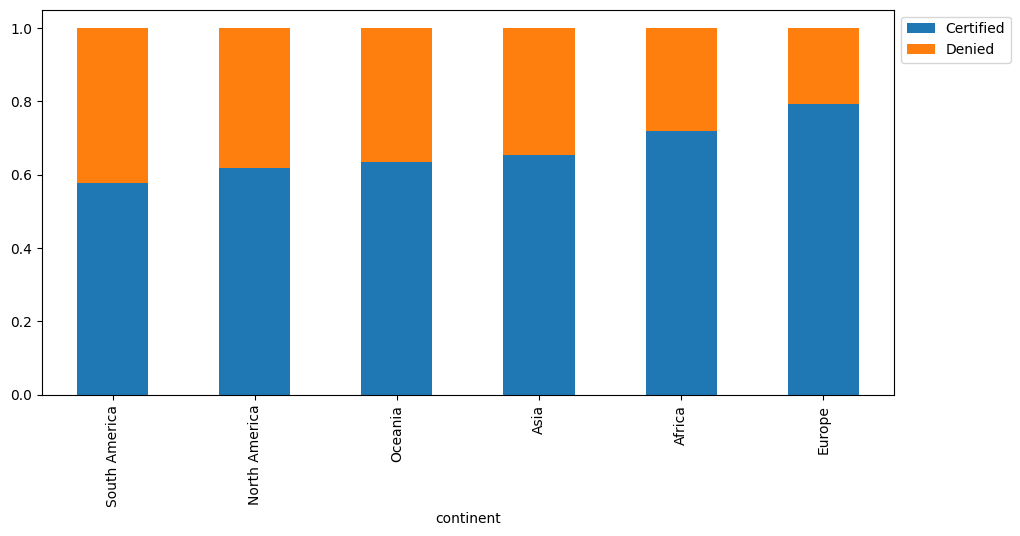

In [ ]:
# How does the visa status vary across different continents?
stacked_barplot(data, 'continent', 'case_status')

* Europe and Asia have the highest certification rates, indicating a smoother process for applicants from these regions.
* South America and North America have higher denial rates, suggesting potential challenges that might need to be addressed.
* Oceania and Africa have favorable outcomes but are slightly less positive than Europe.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


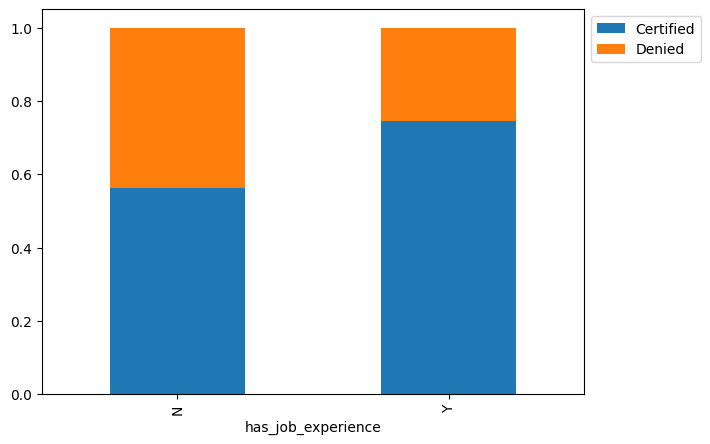

In [ ]:
#Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
stacked_barplot(data, 'has_job_experience', 'case_status')

* Applicants with job experience have a higher likelihood of certification compared to those without job experience.
* Job experience seems to be a significant factor in improving an applicant’s chances of visa approval.
* Understanding the impact of job experience on visa decisions can help tailor application strategies and improve outcomes for those with limited experience.

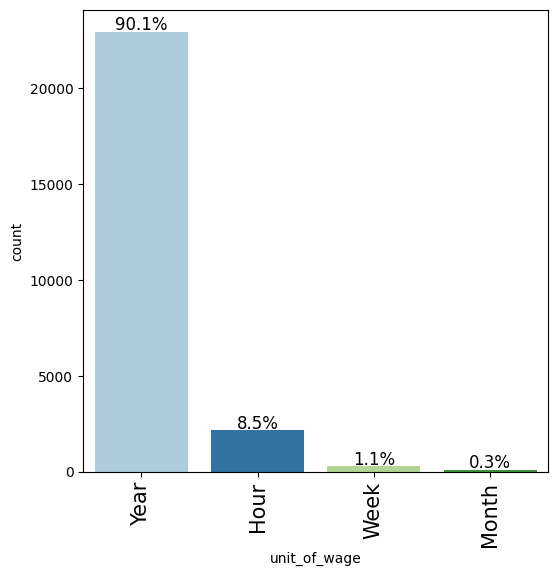

In [ ]:
# In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
labeled_barplot(data, 'unit_of_wage', perc = True)

* Yearly wages make up the majority, indicating a focus on full-time or salaried roles in this dataset.
* Hourly wages represent a smaller but notable portion, reflecting roles with variable hours or part-time work.
* Weekly and monthly wages are rare, suggesting that they are less common in the types of positions represented here.

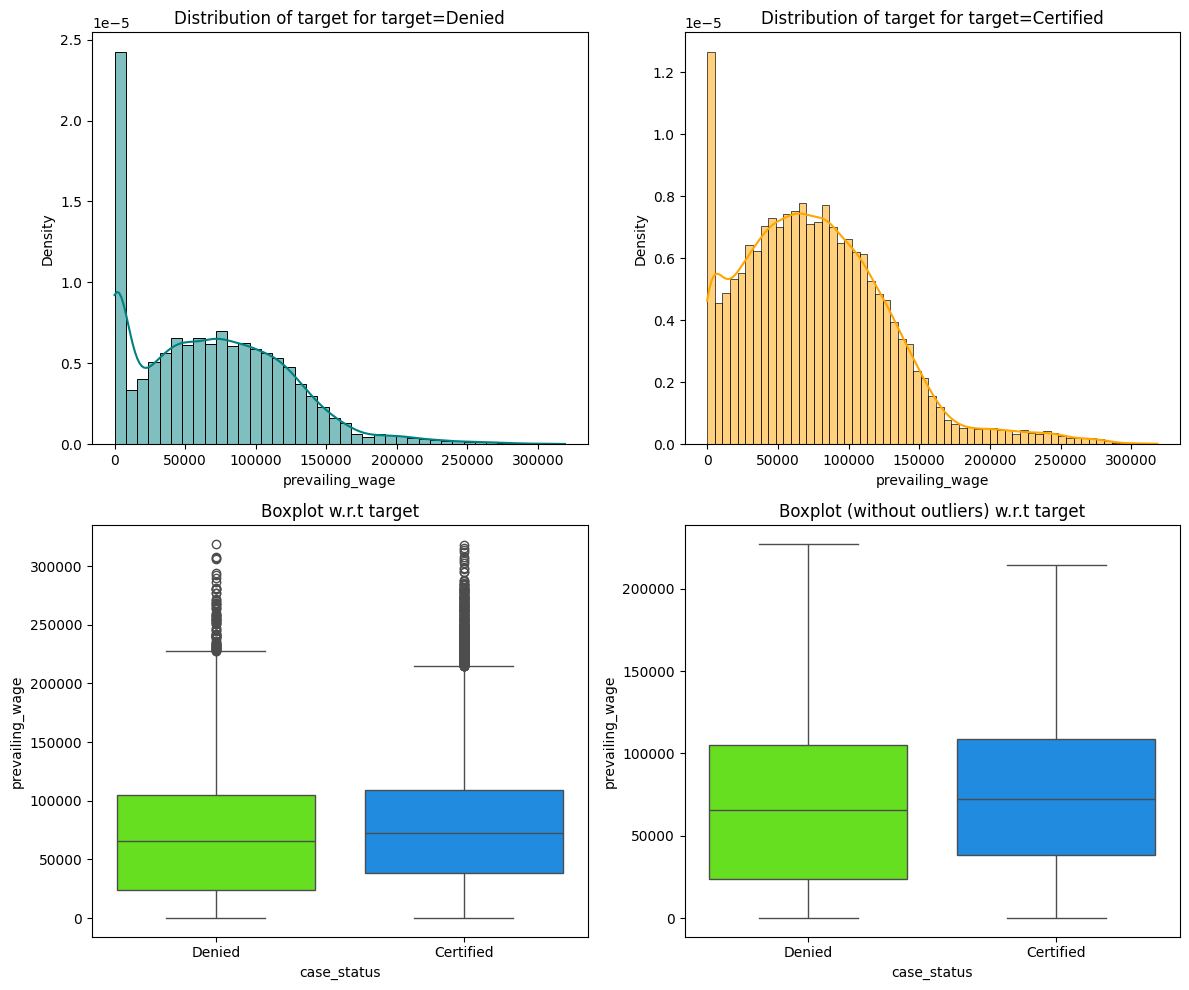

In [ ]:
# The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* High prevailing wages are more often associated with certified cases, while lower wages have a higher proportion of denials.
* Both low and high wages can be certified, but higher wages show a broader spread of certifications.
* The spike at lower wages in both certified and denied cases might indicate the need for further investigation into low-wage job types or specific requirements for certification.

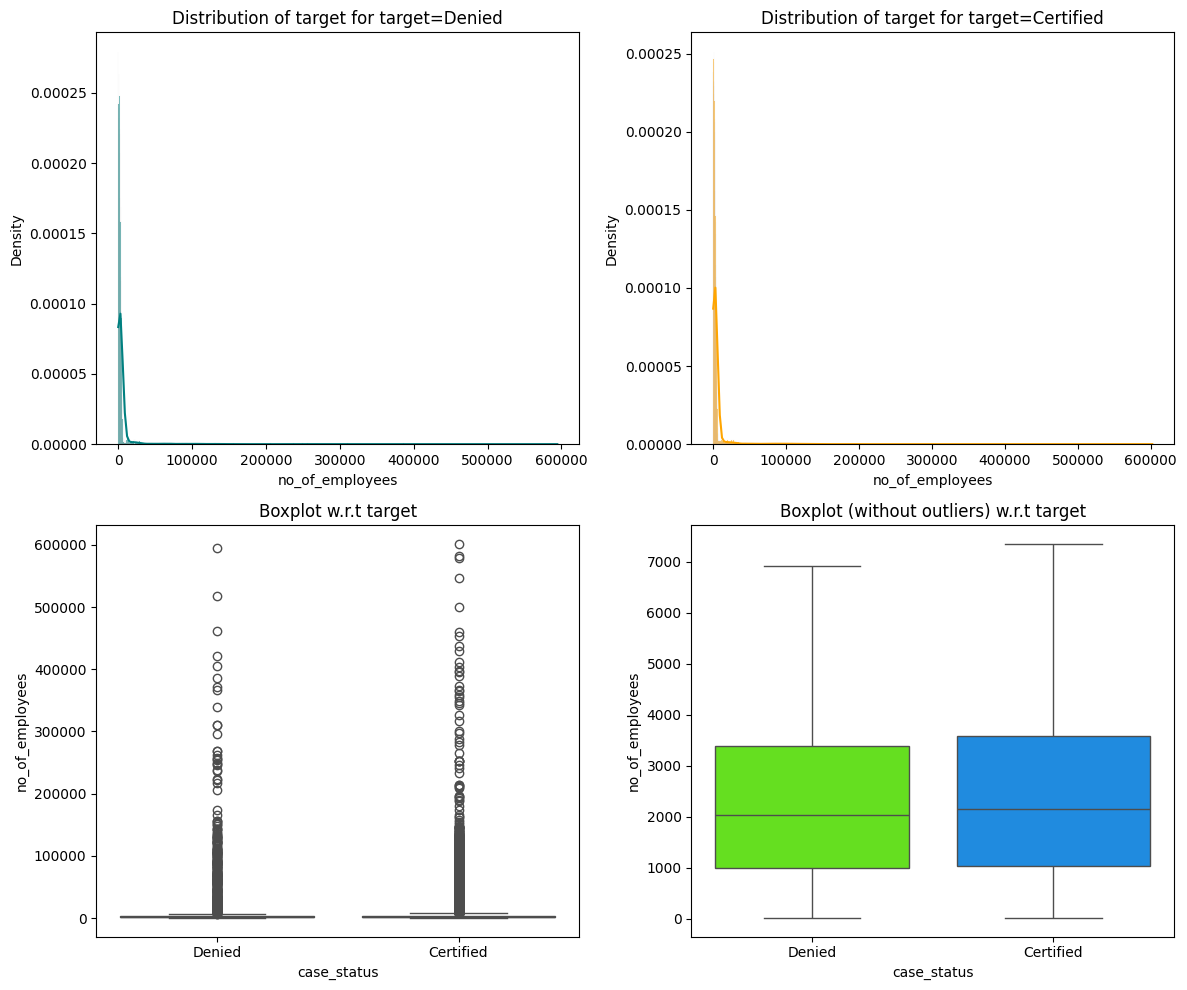

In [ ]:
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status')

* size of the employer (in terms of employees) might not be a strong differentiating factor for visa certification

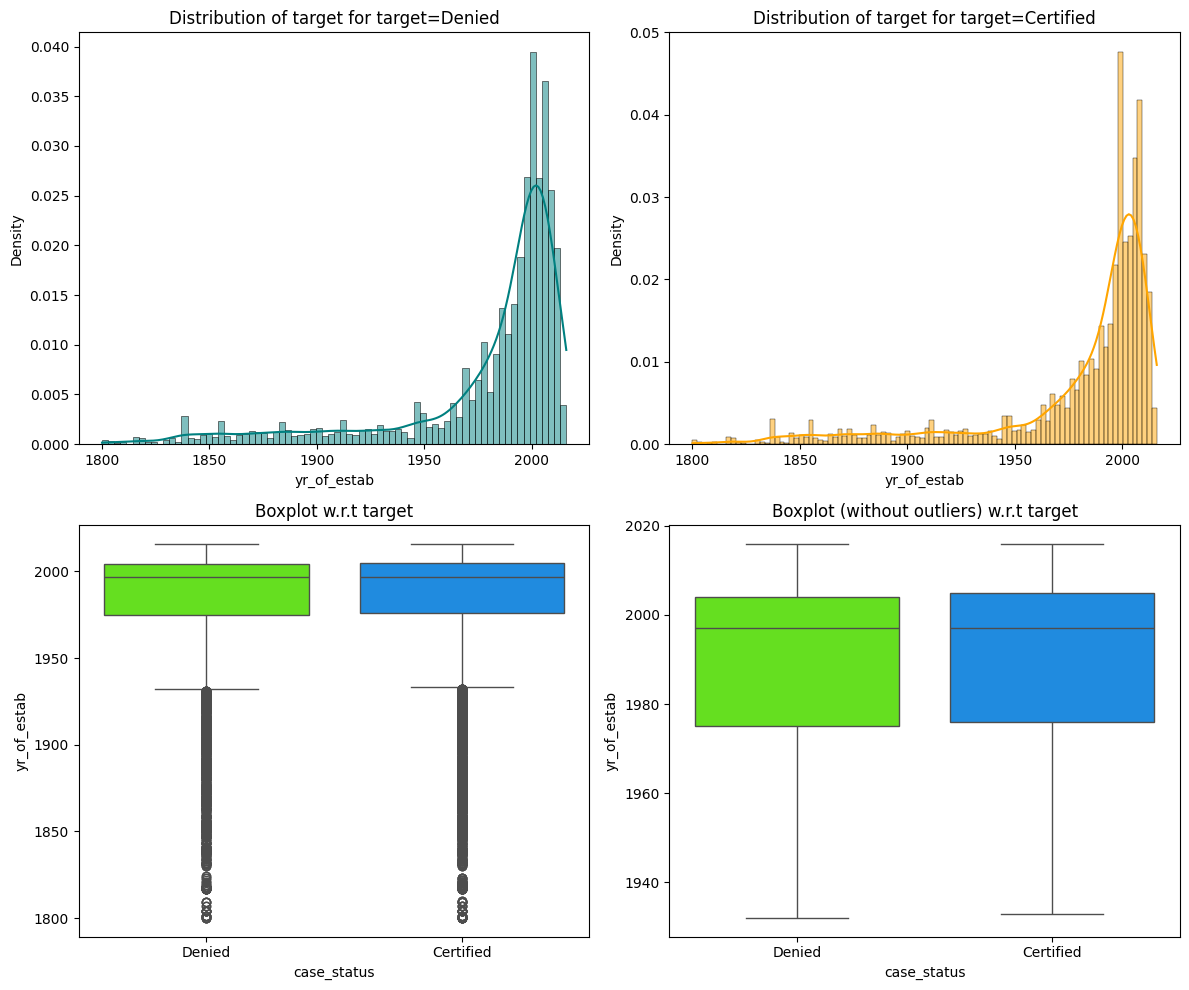

In [ ]:
distribution_plot_wrt_target(data, 'yr_of_estab', 'case_status')

* the age of a company is not a strong factor in determining the outcome of visa certifications.

In [ ]:
# convert all columns with dtype object into category
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


* There are no missing values

In [ ]:
#feature engineering
data['requires_job_training'] = data['requires_job_training'].map({'Y':1,'N':0})
data['has_job_experience'] = data['has_job_experience'].map({'Y':1,'N':0})
data['full_time_position'] = data['full_time_position'].map({'Y':1,'N':0})
data['case_status'] = data['case_status'].map({'Certified':1,'Denied':0})
data = pd.get_dummies(data,columns=['continent','unit_of_wage', 'education_of_employee','region_of_employment'])
data['yr_of_estab'] = 2024 - data['yr_of_estab']

In [ ]:
data= data.astype(int)

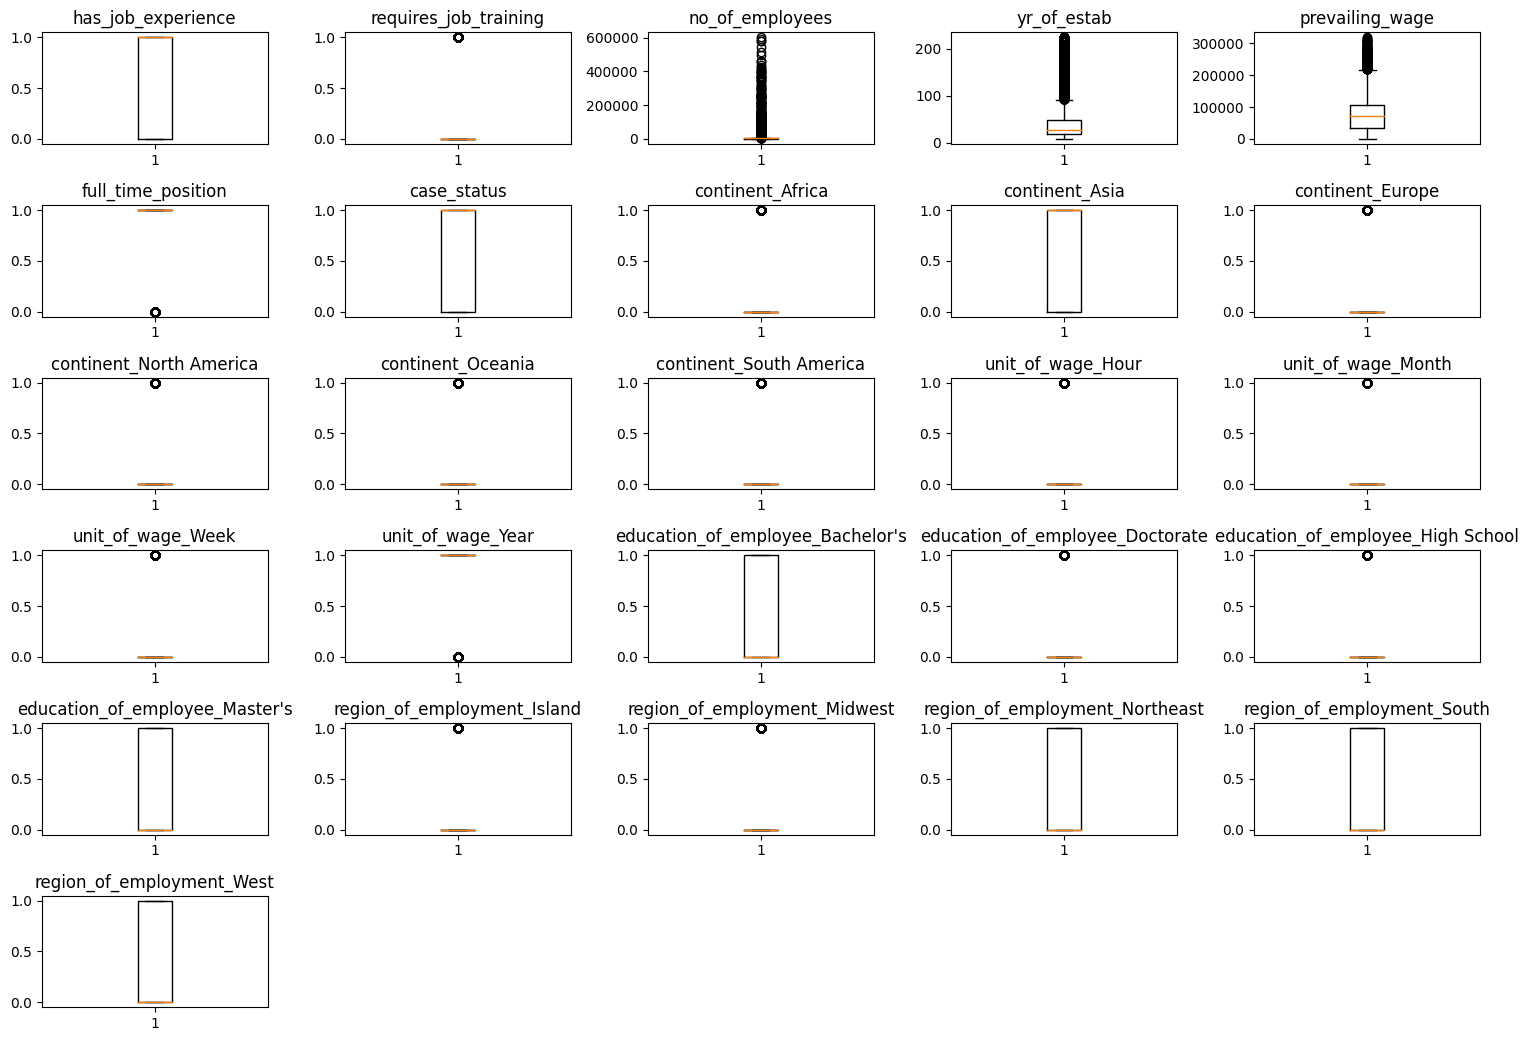

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(7, 5, i + 1)
    plt.boxplot(data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

* there are outliers mainly in number of employees, year of establishment and prevailing wage. As these are real values, I am not going to treat them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

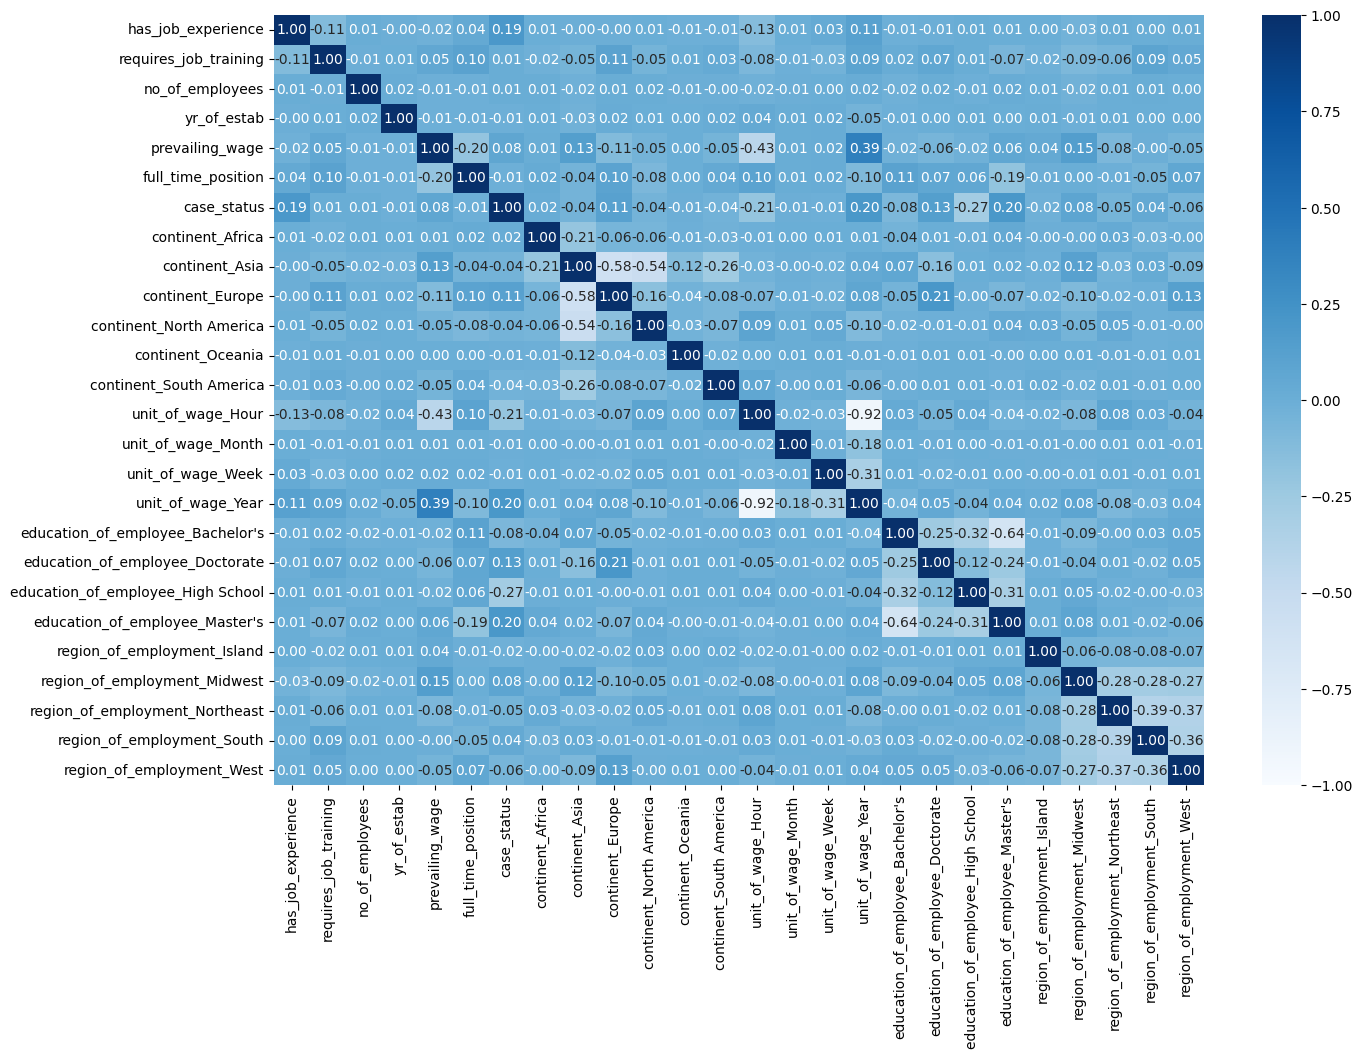

In [ ]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [ ]:
# Preparing data for modeling

## Building bagging and boosting models

#### splitting data into train and test sets

In [ ]:
X = data.drop('case_status',axis=1)
y = data['case_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
## Function to create confusion matrix

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # F1 score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    return score_list # returning the list with train and test scores

## Building the model

- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

#### Decision Tree - Model Building and Hyperparameter Tuning

In [ ]:
X.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0,0,14513,17,592,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,2412,22,83425,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,0,1,44444,16,122996,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0,0,98,127,83434,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,1,0,1082,19,149907,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
dTree = DecisionTreeClassifier(random_state=1, class_weight = 'balanced', criterion='gini')
feature_names = list(X.columns)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

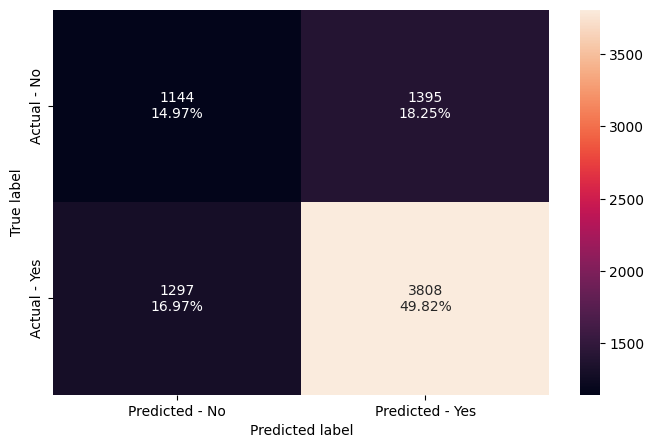

In [ ]:
#create a confusion matrix of the classifier's performance on the testing data
make_confusion_matrix(dTree, y_test)

Confusion Matrix -

Applicant was approved and the model predicted approval : True Positive (observed=1,predicted=1)

Applicant was denied and the model predicted approval : False Positive (observed=0,predicted=1)

Applicant was denied and the model predicted denial : True Negative (observed=0,predicted=0)

Applicant was approved and the model predicted denial : False Negative (observed=1,predicted=0)

In [ ]:
dTree_scores = get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.6478283621140764
Recall on training set :  1.0
Recall on test set :  0.7459353574926543
Precision on training set :  1.0
Precision on test set :  0.7318854507015183
F1 score on training set :  1.0
F1 score on test set :  0.7388436166084594


* Its a clear overfit model

Tuned Decision Tree Model

In [ ]:
# tuned decision tree
dTree_tuned = DecisionTreeClassifier(random_state=1, class_weight = 'balanced')
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dTree_tuned, param_grid, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
dTree_tuned = grid_obj.best_estimator_
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

In [ ]:
dTree_tuned_scores = get_metrics_score(dTree_tuned)

Accuracy on training set :  0.7105292666517157
Accuracy on test set :  0.7083987441130298
Recall on training set :  0.7266851338873499
Recall on test set :  0.7281096963761019
Precision on training set :  0.8194812570995835
Precision on test set :  0.8154892496709083
F1 score on training set :  0.7702985273835476
F1 score on test set :  0.7693262961813101


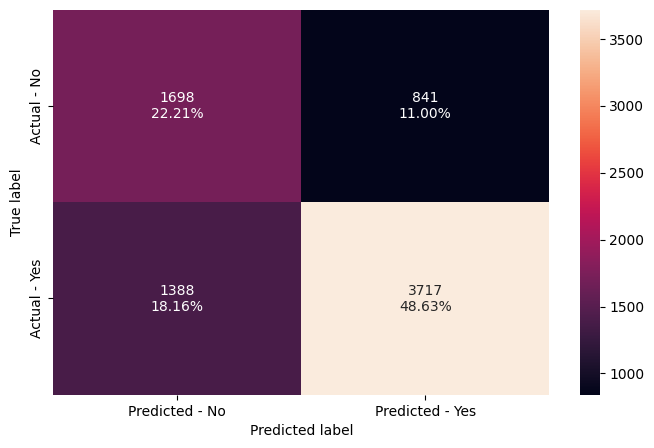

In [ ]:
make_confusion_matrix(dTree_tuned,y_test)

Key Insights:
* The model performs similarly on the training and test sets, indicating that it is not overfitting.
* The recall (ability to identify true positive cases) is slightly higher on the test set than on the training set, suggesting consistent sensitivity in detecting positive cases.
* The precision (accuracy of positive predictions) is slightly lower on the test set compared to the training set, but it remains above 80%, showing that the model makes accurate positive predictions.
* The balanced F1 score suggests that the model has a good trade-off between precision and recall.

Overall, the model is well-balanced between training and test performance, showing good generalization with consistent precision and recall.

Visualization of Decision Tree (tuned)

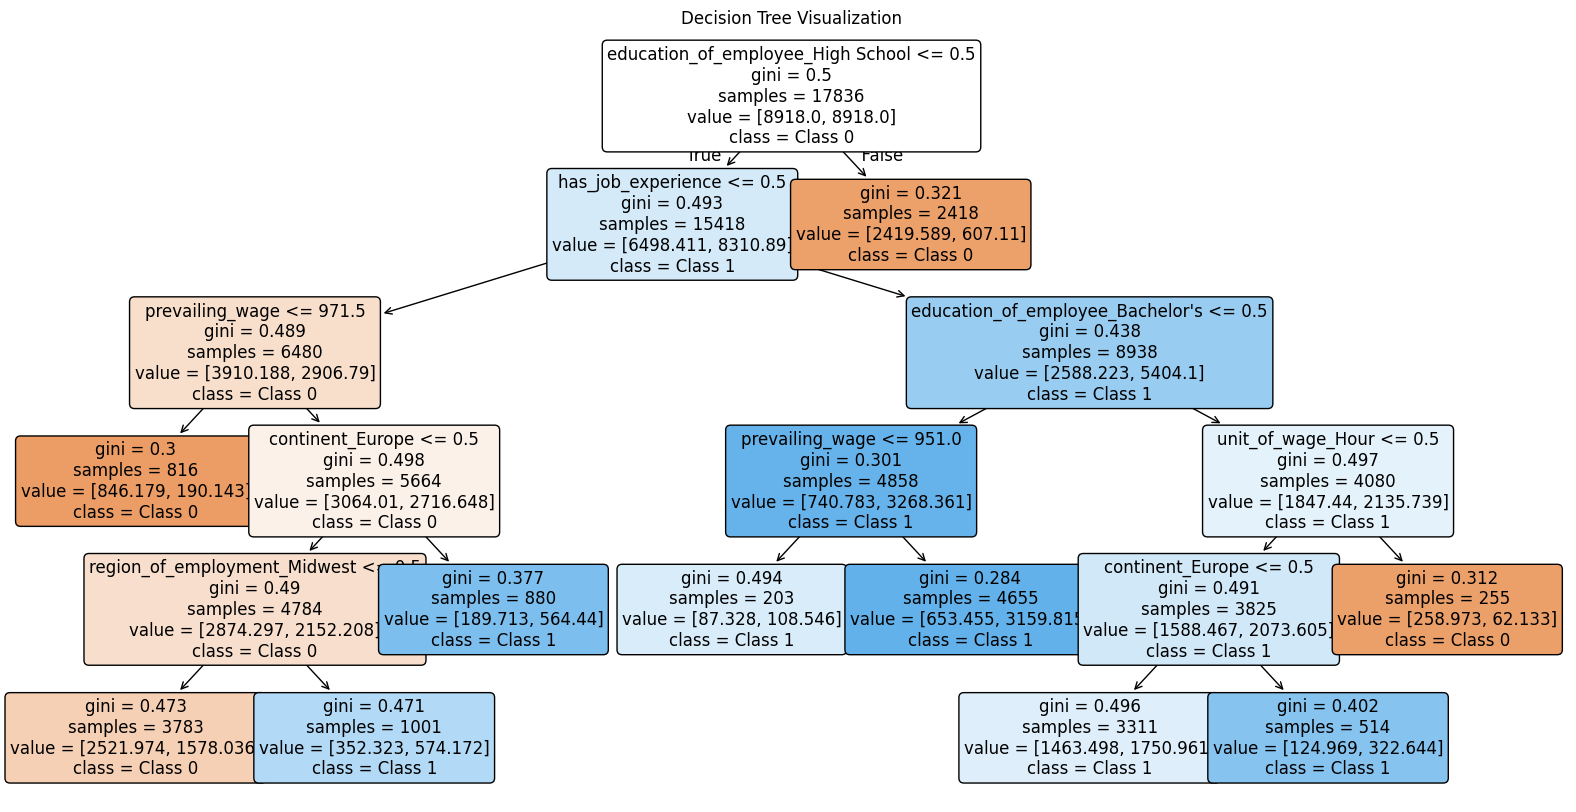

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree with matplotlib
plt.figure(figsize=(20, 10))
plot_tree(
    dTree_tuned,
    feature_names=X_train.columns,  # Replace with the feature names from your training data
    class_names=['Class 0', 'Class 1'],  # Replace with the actual class names if different
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()

#### Bagging - Model Building and Hyperparameter Tuning

Bagging Classifier

In [ ]:
bagging_clf = BaggingClassifier(random_state=1)
bagging_clf.fit(X_train,y_train)

BaggingClassifier(random_state=1)

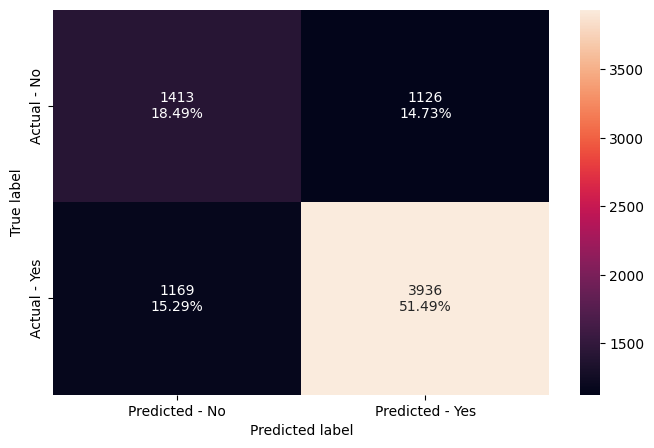

In [ ]:
make_confusion_matrix(bagging_clf,y_test)

In [ ]:
##Using above defined function to get accuracy, recall and precision on train and test set
bagging_clf_scores = get_metrics_score(bagging_clf)

Accuracy on training set :  0.9841892801076475
Accuracy on test set :  0.6997645211930926
Recall on training set :  0.9855619911021573
Recall on test set :  0.7710088148873653
Precision on training set :  0.9907180828622058
Precision on test set :  0.777558277360727
F1 score on training set :  0.9881333108904224
F1 score on test set :  0.7742696960755385


* This is also a clear overfit model

Hyperparameter Tuning - Bagging Classifier

In [ ]:
bagging_clf_tuned = BaggingClassifier(random_state=1, n_jobs=-1)

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(bagging_clf_tuned, param_grid, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_clf_tuned = grid_obj.best_estimator_
bagging_clf_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50, n_jobs=-1,
                  random_state=1)

In [ ]:
bagging_clf_tuned_scores = get_metrics_score(bagging_clf_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1 score on training set :  0.8009008706174997
F1 score on test set :  0.8008471252647267


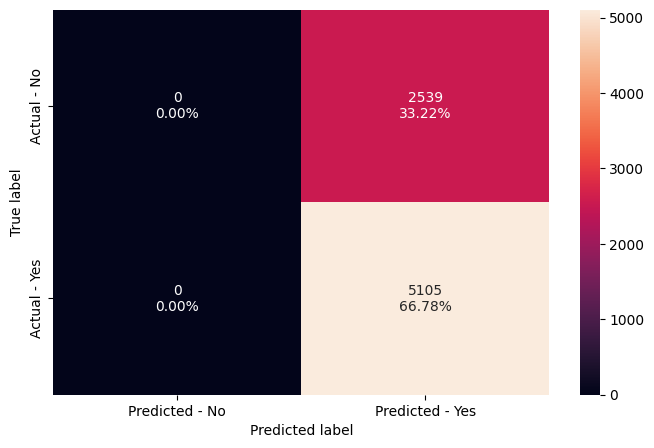

In [ ]:
make_confusion_matrix(bagging_clf_tuned,y_test)

Key Insights:
* The model achieves perfect recall (100%) on both the training and test sets, meaning it correctly identifies all positive cases. However, this can indicate that the model classifies everything as positive, leading to an overemphasis on detecting positive cases.
* Precision and accuracy are relatively low at around 66.78%, suggesting that a significant portion of positive predictions may be false positives.
* The near-identical performance between training and test sets implies that the model is not overfitting but may be underperforming in terms of distinguishing between classes.
* The high recall but low precision indicates an imbalance in how the model treats positive and negative classes, making it more suitable for situations where missing positive cases is highly undesirable, but false positives can be tolerated.

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

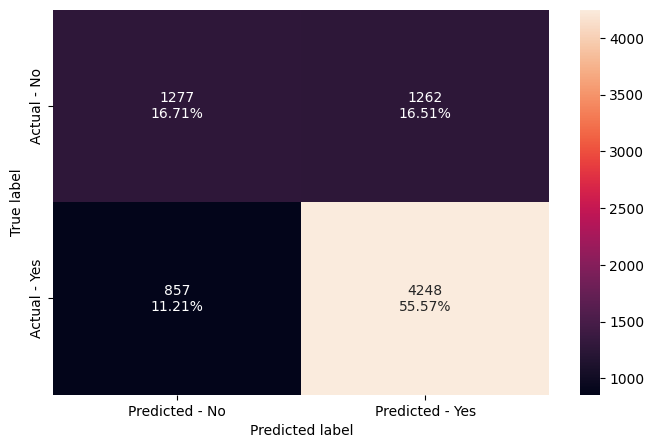

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
rf_scores = get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.7227891156462585
Recall on training set :  1.0
Recall on test set :  0.8321253672869735
Precision on training set :  1.0
Precision on test set :  0.770961887477314
F1 score on training set :  1.0
F1 score on test set :  0.8003768252472916


* Its a clear overfit model

Hyperparameter Tuning - Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1, n_jobs=-1, oob_score=True, bootstrap=True)

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_tuned, param_grid, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       n_jobs=-1, oob_score=True, random_state=1)

In [ ]:
rf_tuned_scores = get_metrics_score(rf_tuned)

Accuracy on training set :  0.7926104507737161
Accuracy on test set :  0.7408424908424909
Recall on training set :  0.9078317804079576
Recall on test set :  0.8742409402546523
Precision on training set :  0.8061270125223614
Precision on test set :  0.7692175112030334
F1 score on training set :  0.8539618618974298
F1 score on test set :  0.8183735215916383


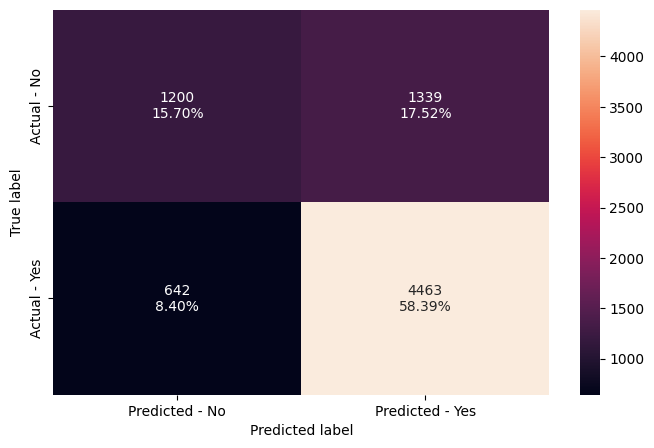

In [ ]:
make_confusion_matrix(rf_tuned,y_test)

Key Insights:
* The model performs better on the training set compared to the test set, with higher accuracy, recall, and precision, indicating that it may be slightly overfitting the training data.
* Recall is relatively high for both sets (90.78% on training and 87.42% on test), meaning the model is effective at identifying positive cases. This is crucial when the goal is to minimize false negatives.
* Precision is lower compared to recall (80.61% on training and 76.92% on test), suggesting that while the model catches most positive cases, it also generates a significant number of false positives.
* The drop in accuracy from training (79.26%) to test (74.08%) suggests that the model is less accurate on unseen data, but the performance is still reasonable, indicating moderate generalization.
* The relatively high F1 score indicates a solid balance between precision and recall, making it suitable for situations where both capturing positives and minimizing false positives are important.

#### Boosting - Model Building and Hyperparameter Tuning

AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

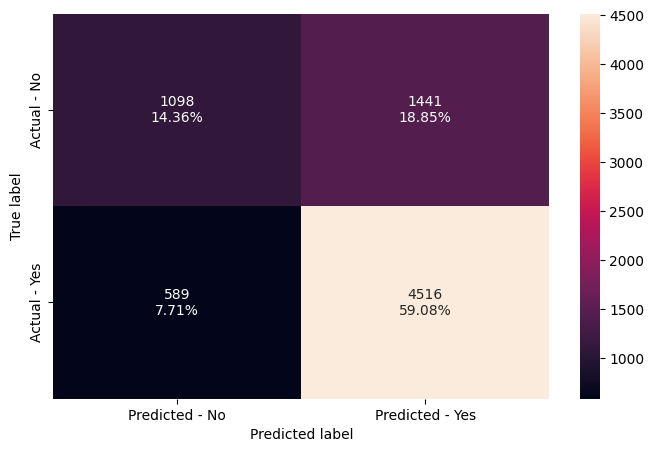

In [ ]:
make_confusion_matrix(abc,y_test)

In [ ]:
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7383381924198251
Accuracy on test set :  0.7344322344322345
Recall on training set :  0.8873499538319483
Recall on test set :  0.8846229187071498
Precision on training set :  0.7607225100748417
Precision on test set :  0.7580997146214538
F1 score on training set :  0.8191716068038282
F1 score on test set :  0.8164888808533719


Key Insights:
* The model demonstrates similar performance on both the training and test sets, suggesting that it generalizes well and does not suffer from significant overfitting.
* Recall is relatively high for both sets (around 88%), indicating that the model is effective at capturing positive cases and is good at minimizing false negatives.
* Precision is lower than recall (around 76%), suggesting that there are a number of false positives, meaning the model sometimes incorrectly predicts positive cases.
* The F1 score (a balance between precision and recall) is consistent across both training (81.92%) and test sets (81.65%), indicating a balanced performance with a slight emphasis on maintaining a good recall rate.

Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.7252186588921283
Accuracy on test set :  0.7159863945578231
Recall on training set :  0.9228573826911777
Recall on test set :  0.921645445641528
Precision on training set :  0.734107905982906
Precision on test set :  0.7265287214329833
F1 score on training set :  0.817732158131578
F1 score on test set :  0.8125377773940075


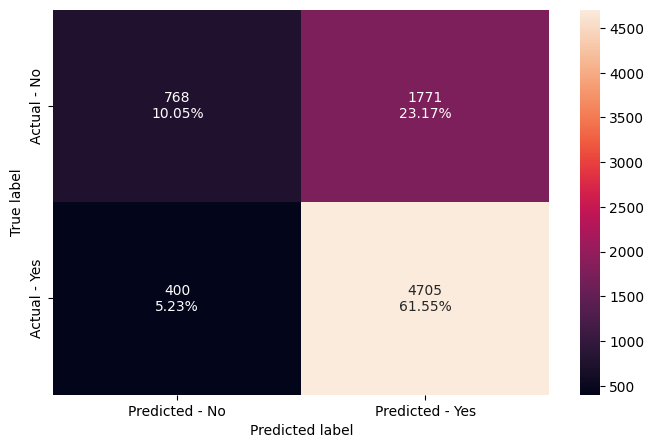

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

Key Insights
* The model performs well in terms of recall, making it suitable for applications where it is crucial to capture as many positive cases as possible, such as visa approvals where missing a potential approval could be costly.
* The consistency between training and test set metrics indicates good generalization, making this model reliable for deployment.
* There is a trade-off between precision and recall, with a higher recall and slightly lower precision, which could be adjusted depending on whether minimizing false positives or maximizing true positives is more important.
* The F1 score, which balances precision and recall, is nearly identical on both sets, suggesting that the model maintains a consistent trade-off between identifying positives and avoiding false positives.

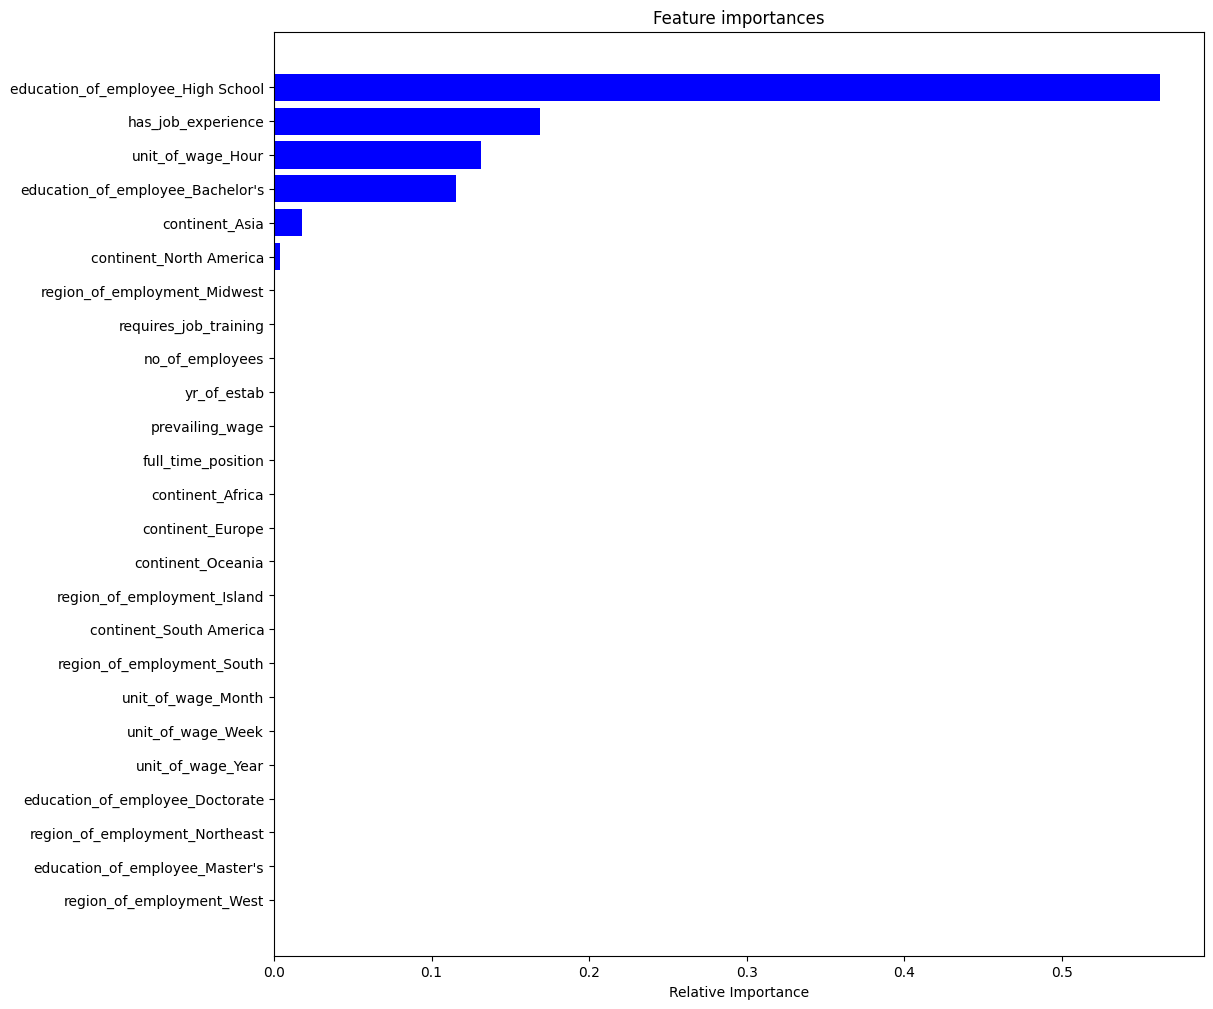

In [ ]:
# importances
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

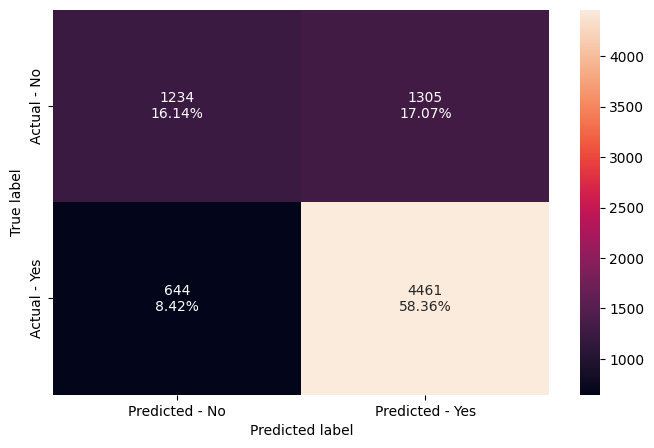

In [ ]:
make_confusion_matrix(gbc,y_test)

In [ ]:
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.7575128952679973
Accuracy on test set :  0.7450287807430664
Recall on training set :  0.8828170905733232
Recall on test set :  0.8738491674828599
Precision on training set :  0.7821656998363826
Precision on test set :  0.7736732570239334
F1 score on training set :  0.8294491107693521
F1 score on test set :  0.8207156655321498


Key Insights:
* The model shows similar performance on the training and test sets, indicating a good level of generalization with minimal overfitting.
* High Recall (above 87% for both sets) suggests that the model is effective at identifying positive cases, making it suitable for situations where minimizing false negatives is crucial.
* Moderate Precision (around 78% on training and 77% on test) indicates that while the model captures many true positives, it also produces some false positives.
* The F1 Score (which balances precision and recall) is consistent, being slightly higher on the training set (82.94%) than on the test set (82.07%), which shows that the model maintains a good balance between sensitivity and precision.

Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# choose type of classifier
gbc_tuned = GradientBoostingClassifier(init= AdaBoostClassifier(random_state=1),random_state=1)

#grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# type of scoring used to cmpare paramter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# run the grid search
grid_obj = GridSearchCV(gbc_tuned, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=75,
                           random_state=1, subsample=0.7)

In [ ]:
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.6842901995963221
Accuracy on test set :  0.684981684981685
Recall on training set :  0.9899269705363888
Recall on test set :  0.9905974534769834
Precision on training set :  0.6815187239944521
Precision on test set :  0.6818120533908588
F1 score on training set :  0.8072697402197351
F1 score on test set :  0.807698450726721


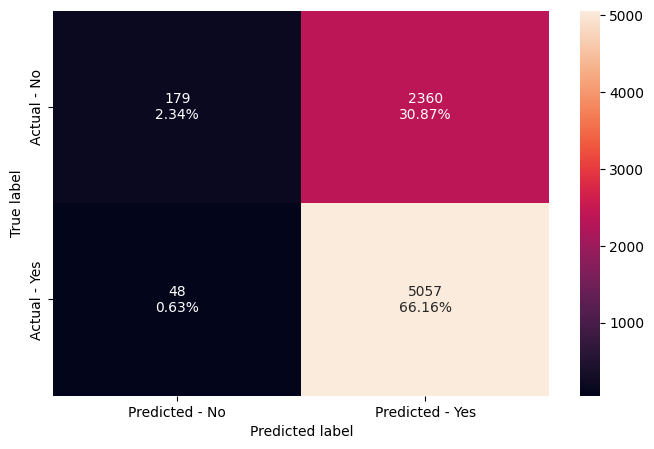

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

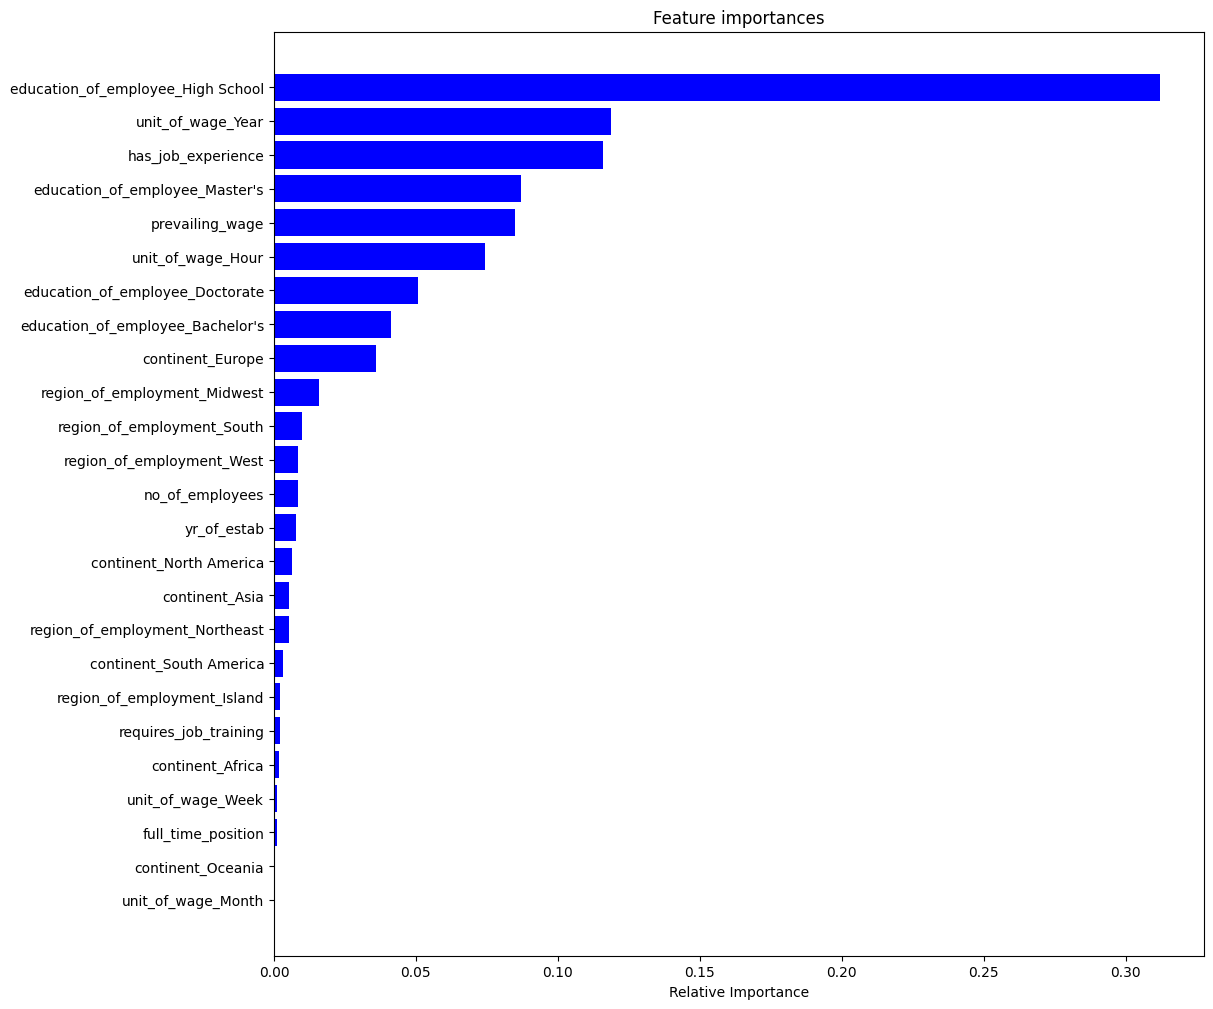

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Key Insights:

* The model shows similar performance on the training and test sets, with accuracy around 75.75% on training and 74.50% on the test set, indicating a good level of generalization with minimal overfitting.
* High Recall (approximately 88% on training and 87.38% on test) suggests that the model is effective at identifying positive cases, making it suitable for scenarios where capturing as many positives as possible is critical.
* Moderate Precision (around 78% on training and 77.37% on test) indicates that while the model captures most true positives, it also generates some false positives.
* The F1 score (around 82.94% on training and 82.07% on test) reflects a well-balanced trade-off between precision and recall, demonstrating that the model effectively manages both false positives and false negatives.

XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

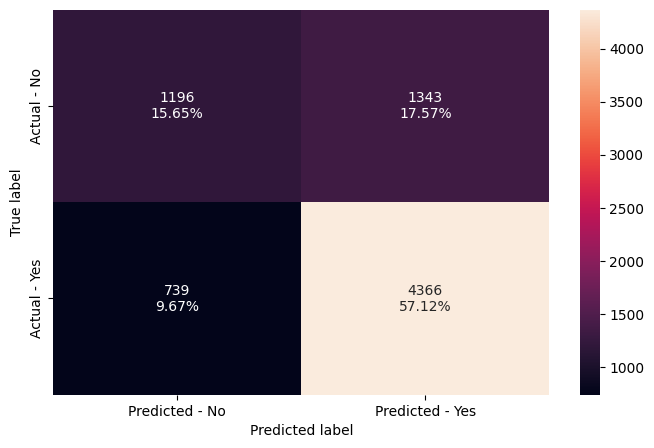

In [ ]:
make_confusion_matrix(xgb,y_test)

In [ ]:
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.8423413321372505
Accuracy on test set :  0.7276295133437991
Recall on training set :  0.9320070511206245
Recall on test set :  0.8552399608227228
Precision on training set :  0.8472338801983975
Precision on test set :  0.7647574005955509
F1 score on training set :  0.8876009273323208
F1 score on test set :  0.807471795820233


* Its an overfit model

Hyperparameter Tuning - XGBoost Classifier


In [ ]:
#choose the type of classifier.
import xgboost as xgb
from xgboost import XGBClassifier
xgb_tuned = XGBClassifier(random_state = 1)

#grid of parameters to choose from

param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#run the grid search

grid_obj = GridSearchCV(xgb_tuned, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1 score on training set :  0.8009008706174997
F1 score on test set :  0.8008471252647267


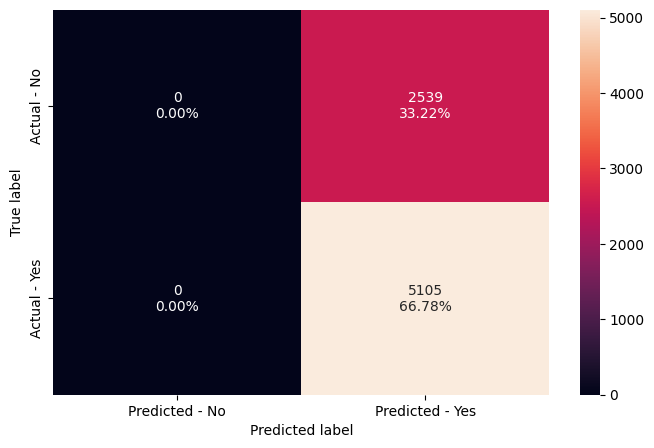

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

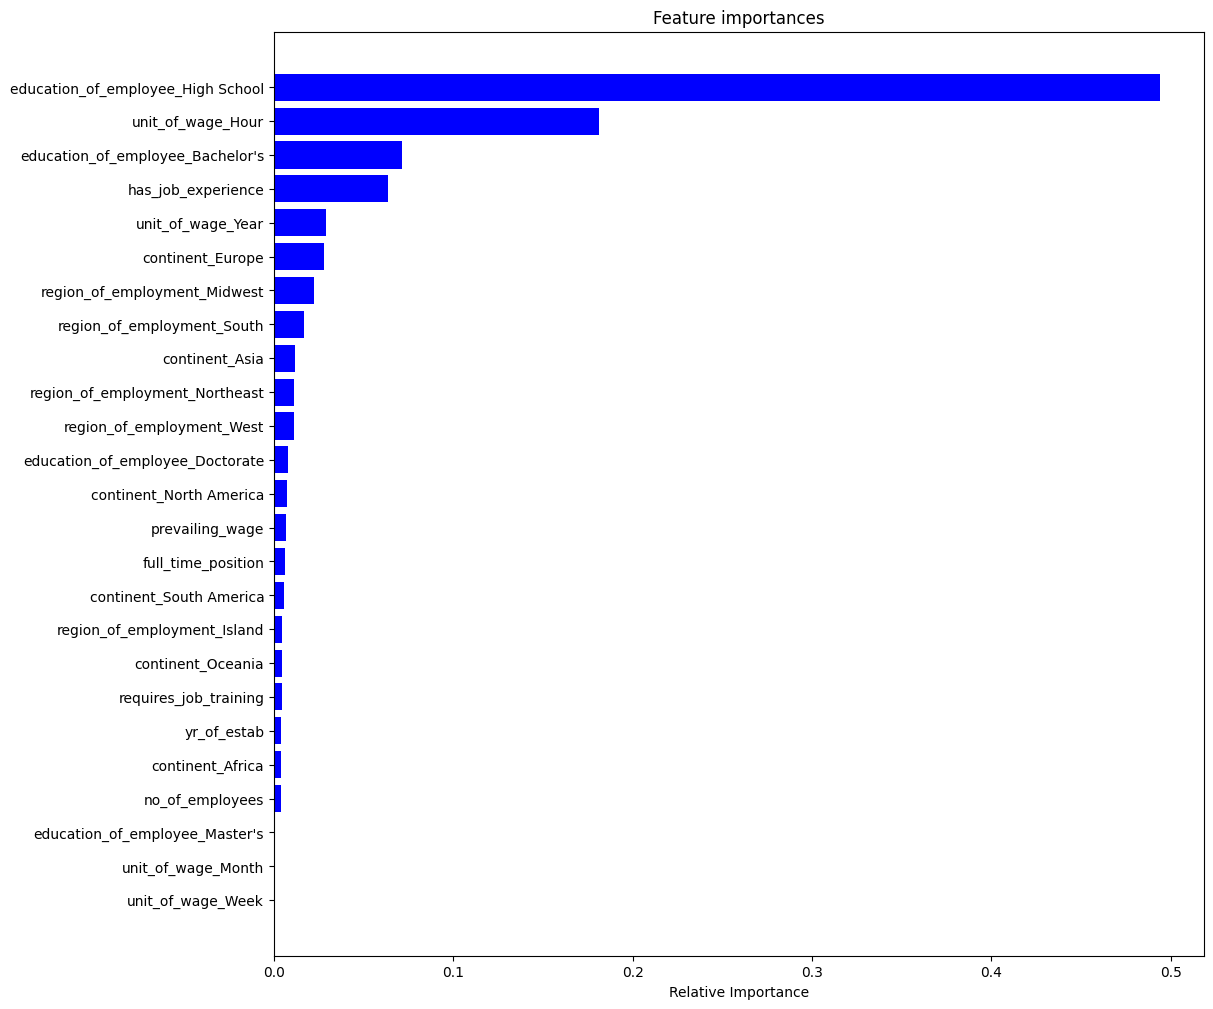

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Key Insights:

* The model shows consistent performance on the training and test sets, with accuracy of around 66.79%, indicating a good level of generalization.
* Perfect Recall (100% on both training and test sets) suggests that the model identifies all positive cases, ensuring no false negatives. This makes it highly suitable for scenarios where missing a positive case would be costly.
* Moderate Precision (around 66.79% on both training and test sets) indicates that while the model captures all positives, it also produces a significant number of false positives.
* The F1 score (around 80.09% on both sets) highlights the model's ability to balance precision and recall, making it effective in scenarios where both high recall and reasonable precision are important.

Stacking classifier

In [ ]:
estimators = [('abc',abc_tuned),('gbc',gbc_tuned),('xgb',xgb_tuned), ('rf',rf_tuned)]

final_estimator = xgb_tuned

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('abc',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                                    random_state=1),
                                                   learning_rate=0.01,
                                                   random_state=1)),
                               ('gbc',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.01,
                                                           max_features=1,
                                                           n_estimators=75,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('xgb',
                                XGBClassifier(base_score=None...
                                                 feature_types=None, gamma=1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [ ]:
stacking_clf_scores = get_metrics_score(stacking_clf)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1 score on training set :  0.8009008706174997
F1 score on test set :  0.8008471252647267


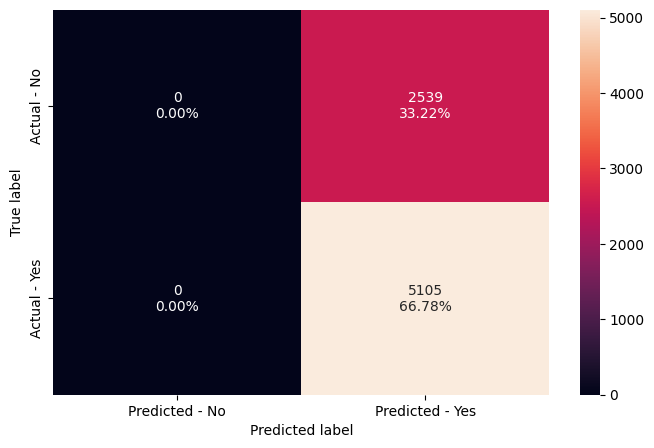

In [ ]:
make_confusion_matrix(stacking_clf,y_test)

Key Insights:

* The model exhibits similar performance on the training and test sets, with an accuracy of about 66.79%, indicating that it generalizes well and is not overfitting.
* Perfect Recall of 1.0 on both the training and test sets means that the model is identifying all positive cases correctly, with no false negatives.
* Precision is around 66.79% on both sets, suggesting that while the model captures all positive cases, it also generates a significant number of false positives.
* The F1 score (approximately 80.09% on training and 80.08% on test) shows a balanced trade-off between precision and recall, reflecting the model's ability to effectively handle the imbalance between true positives and false positives.

##  Will tuning the hyperparameters improve the model performance?

I did hyperparameter tuning along with base models, yes hyperparamter tuning provided better results

## Model Performance Comparison and Conclusions

In [456]:
from xgboost import XGBClassifier

In [459]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# xgboost_classifier_scores = model_comparison(xgb)

Base Models Performance:
                              Accuracy  Precision  Recall  F1 Score
Decision Tree                     0.65       0.73    0.75      0.74
Bagging Classifier                0.70       0.78    0.77      0.77
AdaBoost Classifier               0.73       0.76    0.88      0.82
Gradient Boosting Classifier      0.75       0.77    0.87      0.82
XGBoost Classifier                0.73       0.76    0.86      0.81
Random Forest                     0.72       0.77    0.83      0.80

Tuned Models Performance:
                                    Accuracy  Precision  Recall  F1 Score
Decision Tree Tuned                     0.71       0.82    0.73      0.77
Bagging Classifier Tuned                0.67       0.67    1.00      0.80
AdaBoost Classifier Tuned               0.72       0.73    0.92      0.81
Gradient Boosting Classifier Tuned      0.68       0.68    0.99      0.81
XGBoost Classifier Tuned                0.67       0.67    1.00      0.80
Random Forest Tuned         

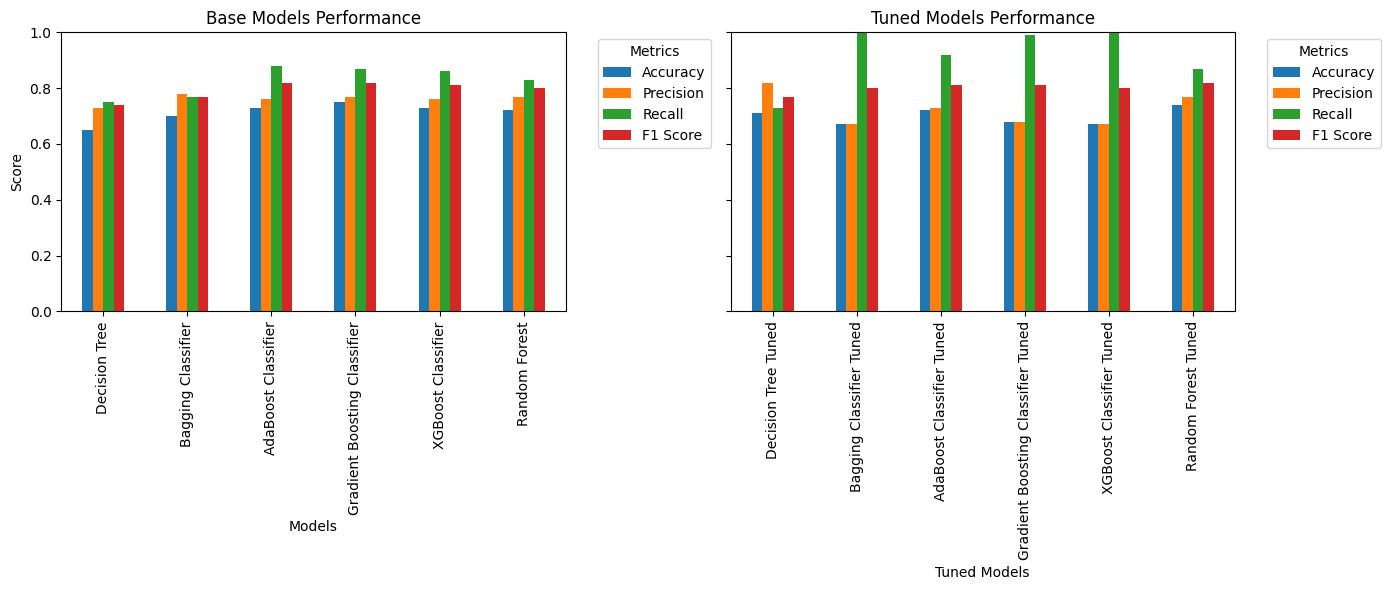

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Function to calculate and return performance metrics as a dictionary
def model_comparison(model, flag=True):
    '''
    model : classifier to predict values of X
    flag : If True, prints the metrics. Default is True.
    '''
    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    # F1 score of the model
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    # Create a dictionary with the test set metrics
    test_set_scores = {
        'Accuracy': round(test_acc, 2),
        'Precision': round(test_precision, 2),
        'Recall': round(test_recall, 2),
        'F1 Score': round(test_f1, 2)
    }

    return test_set_scores

# Get metrics for each base model
decision_tree_scores = model_comparison(dTree)
bagging_classifier_scores = model_comparison(bagging_clf)
random_forest_scores = model_comparison(rf)
ada_boost_classifier_scores = model_comparison(abc)
gradient_boosting_classifier_scores = model_comparison(gbc)
xgboost_classifier_scores = model_comparison(xgb)

# Get metrics for each tuned model
decision_tree_tuned_scores = model_comparison(dTree_tuned)
bagging_classifier_tuned_scores = model_comparison(bagging_clf_tuned)
random_forest_tuned_scores = model_comparison(rf_tuned)
ada_boost_classifier_tuned_scores = model_comparison(abc_tuned)
gradient_boosting_classifier_tuned_scores = model_comparison(gbc_tuned)
xgboost_classifier_tuned_scores = model_comparison(xgb_tuned)

# Create a DataFrame for base models
base_models_scores = pd.DataFrame(
    [decision_tree_scores, bagging_classifier_scores, ada_boost_classifier_scores,
     gradient_boosting_classifier_scores, xgboost_classifier_scores, random_forest_scores],
    index=['Decision Tree', 'Bagging Classifier', 'AdaBoost Classifier',
           'Gradient Boosting Classifier', 'XGBoost Classifier', 'Random Forest'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score']
)

# Create a DataFrame for tuned models
tuned_models_scores = pd.DataFrame(
    [decision_tree_tuned_scores, bagging_classifier_tuned_scores, ada_boost_classifier_tuned_scores,
     gradient_boosting_classifier_tuned_scores, xgboost_classifier_tuned_scores, random_forest_tuned_scores],
    index=['Decision Tree Tuned', 'Bagging Classifier Tuned', 'AdaBoost Classifier Tuned',
           'Gradient Boosting Classifier Tuned', 'XGBoost Classifier Tuned', 'Random Forest Tuned'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score']
)

# Display the DataFrames
print("Base Models Performance:")
print(base_models_scores)
print("\nTuned Models Performance:")
print(tuned_models_scores)

# Plotting the performance for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for base models
base_models_scores.plot(kind='bar', ax=axes[0])
axes[0].set_title('Base Models Performance')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
axes[0].legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for tuned models
tuned_models_scores.plot(kind='bar', ax=axes[1])
axes[1].set_title('Tuned Models Performance')
axes[1].set_xlabel('Tuned Models')
axes[1].set_ylim(0, 1)
axes[1].legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Key Insights:

1.	Top Performers:

*	Gradient Boosting and AdaBoost are the best among the base models, both achieving an F1 Score of 0.82, which indicates a good balance between precision and recall, making them effective for visa certifications.
*	AdaBoost excels in recall (0.88), ensuring fewer eligible applicants are missed, while Random Forest follows with an F1 Score of 0.80.

2.	Tuned Model Improvements:

*	Tuning boosted recall significantly, especially for Bagging Classifier Tuned with a 1.00 recall, ensuring no eligible cases are missed, though it has a lower precision.
*	Gradient Boosting Tuned and AdaBoost Tuned maintain high recall (around 0.99 and 0.92, respectively) while having F1 Scores around 0.81, making them suitable for balancing between thorough screening and final decisions.

3.	Precision vs. Recall Trade-off:

*	High-recall models (e.g., Bagging Classifier Tuned) minimize missed eligible applicants but may include more false positives, reflected in their lower precision but higher F1 Scores.
*	Balanced models like Random Forest Tuned (F1 Score: 0.82) and AdaBoost Classifier Tuned (F1 Score: 0.81) reduce false positives while maintaining good recall, making them ideal for the final decision process.

4.	Consistency and Robustness:
*	XGBoost shows consistent performance across its base and tuned versions with an F1 Score of 0.81, making it a reliable choice when stability in results is needed.

## Actionable Insights and Recommendations

1. Prioritize Applications with High Education and Experience:

* Use insights from EDA to target applications with higher degrees (e.g., Master's, Doctorate) and job experience during the initial model-based screening. This will align with the trends observed in the data, where these applicants have higher chances of approval.

2. Use Region and Wage Data for Customized Strategies:

* Focus on high-demand regions and roles with higher prevailing wages to align with regions and job types that have a higher likelihood of certification. This can improve the precision of the model-based recommendations.
* Adjust the threshold for certification based on regional demand, ensuring that the models account for local labor market conditions.

3. Refine the Screening Process with Model Insights:

* Use high-recall models (e.g., Bagging Classifier Tuned, Gradient Boosting Tuned) for initial screenings to ensure all eligible applicants are considered.
*	Apply balanced models (e.g., Random Forest Tuned, AdaBoost Tuned) for final decisions to reduce false positives and achieve a good F1 Score.
